# Problem Set 6
## Ying Sun

In [1]:
# import packages
import pandas as pd
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## 1. Multiple linear regression 

(a) Import the data

In [2]:
# import the data
auto = pd.read_csv('auto.csv', na_values = "?")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [4]:
auto.dropna(inplace=True)

(b) Produce a scatterplot matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120c14ba8>,
      dtype=object)

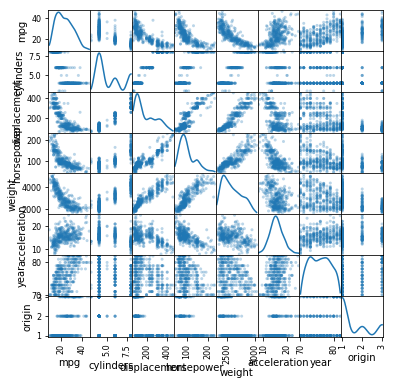

In [5]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(auto[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration","year", "origin"]], 
               alpha=0.3, figsize=(6, 6), diagonal='kde')

(c) Compute the correlation matrix

In [6]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(d) Estimate the multiple linear regression model

In [7]:
Y = auto.mpg
X = auto[['cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        01:37:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

(i) Coefficients of displacements, weight, year, and origin are statisticaly significant at the 1% level.  
(ii) Coefficients of cylinders, horsepower, acceleration are not statisticaly significant at the 10% level.  
(iii) Keeping all else constant, a single unit change in year (one year) results in a 0.7508 unit (miles per gallon) increase in MPG.

(e) Looking at your scatterplot matrix from part (b), what are the three variables that look most likely to have a nonlinear relationship with $mpg_{i}$

Based on the scatterplot matrix from part b, displacement, horsepower, and weight look most likely to have a nonlinear relationship with $mpg_{i}$

In [8]:
# (i)
# create squared variables for new regression model.
auto['displacement2'] = auto.displacement.apply(lambda x: x**2)
auto['horsepower2'] = auto.horsepower.apply(lambda x: x**2)
auto['weight2'] = auto.weight.apply(lambda x: x**2)
auto['acceleration2'] = auto.acceleration.apply(lambda x: x**2)
# new regression
Y = auto.mpg
X2 = auto[['cylinders', 'displacement','displacement2', 'horsepower', 'horsepower2', 'weight', 'weight2', 'acceleration', 'acceleration2', 'year', 'origin']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y,X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        01:37:34   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.1084      6.696      3.003

(ii) The adjusted R-squared statistic for the second regression model is 0.866. It is better than the adjusted R-squared statistic from the first model (0.818).

(iii) The coefficient of displacement and its squared term become nonsignificant at 10% level while the coefficient of displacement is significant at 1% level in the first model.

(iv) The coefficient for cylinders is still not significant in this model at 10% level.

(f) Apply the regression model and predict

In [9]:
X_ap = [1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99, 1]
results2.predict(exog = X_ap)[0]

38.73211109716943

## 2. Classification problem: KNN by hand and in Python

(a) Compute the Euclidean distance between each observation and the test pointX1 =X2 =X3 =0.

In [10]:
pts = np.array([[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
distance = np.zeros((6,1))
for i in range(6):
    distance[i,0] = np.sqrt((pts[i,0]-0)**2+(pts[i,1]-0)**2+(pts[i,2]-0)**2)
for i in range(6):
    print("The Euclidean distance between observation", i+1, "to the test point is", distance[i,0])

The Euclidean distance between observation 1 to the test point is 3.0
The Euclidean distance between observation 2 to the test point is 2.0
The Euclidean distance between observation 3 to the test point is 3.1622776601683795
The Euclidean distance between observation 4 to the test point is 2.23606797749979
The Euclidean distance between observation 5 to the test point is 1.4142135623730951
The Euclidean distance between observation 6 to the test point is 1.7320508075688772


(b) What is our KNN prediction with K = 1? Why?

For K = 1, the closest observation to $(X_1=0, X_2=0, X_3=0)$ is observation 5 (Y= Green) so our KNN prediction for K = 1 is Y = green.

(c) What is our KNN prediction with K = 3? Why?

For K = 3, the three nearest observations to the test point are observation 2 (Y = red), observation 5 (Y = green), and observation 6 (Y = red). So our KNN prediction for K = 3 is Y = red.

(d) If the Bayes (optimal) decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

If the Bayes Optimal Decision Boundary is highly nonlinear, then we would expect the best value for K to be small. Because the highly nonlinear optimal Bayes decsion implies that the model has low bias and high variance. As K gets larger, the boundary line will involoves more linear characteristics.

(e) Use Python’s scikit-learn library to estimate the KNN classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

ys = np.array(['Red','Red','Red','Green','Green','Red']).reshape(-1,1)
test_point = np.array([1,1,1]).reshape(1,-1)
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
cls = knn.fit(pts, ys)
print('The KNN classifier of the test point is', cls.predict(test_point)[0])

The KNN classifier of the test point is Red


## 3. Multivariable logistic (logit) regression

(a) Estimate the logistic regression

In [12]:
auto['mpg high']=np.where(auto['mpg']>np.median(auto['mpg']),1,0)
X = auto[['cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)
log1 = sm.Logit(auto['mpg high'], X)
resultslog = log1.fit()
print(resultslog.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Feb 2019   Pseudo R-squ.:                  0.7101
Time:                        01:37:52   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

According to the results above, weight and year are the regressors that have coefficients that are statistically significant at the 5% level.

(b) Split the training data and testing data

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, auto['mpg high'], 
                                                    test_size = 0.5, random_state=10)

(c) Use scikit-learn to estimate a logistic regression model on the training data

In [14]:
from sklearn.linear_model import LogisticRegression
log2 = LogisticRegression().fit(X_train, y_train)
coeff=pd.concat([pd.DataFrame(X.columns,columns=["Name"]),
                 pd.DataFrame(np.transpose(log2.coef_),columns=["Value"])],axis = 1)
coeff

,Name,Value
0,const,-0.072986
1,cylinders,-0.697489
2,displacement,0.006396
3,horsepower,-0.037326
4,weight,-0.005048
5,acceleration,-0.134720
6,year,0.299566
7,origin,-0.156592


(d) Prediction

In [15]:
y_pred = log2.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.87        97

   micro avg       0.87      0.87      0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



From the above result, we get the same F1 score, precision and recall, so this model predicts equally well for high mpg and low mpg.